# Lecture 8: Estimation

```{note}
Having sampled the population, in this lecture we will estimate the numerical properties of the population through the sample statistics.
```

---

Recall that a population is a collection of units, and we are often interested in understanding its numerical properties, known as parameters — such as measures of location, dispersion, and shape. Since we rarely observe the entire population, we rely on samples to estimate these parameters. A statistic is any quantity computed from a sample, and it serves as the basis for making inferences about the population. An estimator is a rule or formula that assigns a numerical value—called an estimate—to each possible random sample of size $n$. For example, the sample mean is a statistic that serves as an estimator of the population mean, computed by taking the average of the values in a specific sample. The result is the estimate produced by this estimator, unqiue for each sample.

Because the estimates depend on the particular sample drawn, it is itself a random variable. As such, the estimate will typically differ from the true population parameter. To understand how close an estimator is likely to be to the parameter, we must study how the estimator varies across different samples.This leads us to analyze the behavior of estimators using tools from probability, particularly their expected value (to assess bias) and variability (to quantify sampling error). These characteristics help us evaluate the reliability of our estimates.

# Bias

For a given sample, an estimator — $\hat{\theta}$, may differ from the true parameter — $\theta$, due to two main factors: systematic bias — $\text{B}[\hat{\theta}]$, arising from aspects such as model assumptions, measurement errors, or sampling design; and chance variability —  $\epsilon$, which reflects the randomness inherent in which sample happens to be drawn (luck of the draw). Hence,

$$\hat{\theta} = \theta + \text{B}[\hat{\theta}] + \epsilon$$

The average value of chance variability in repeated sampling will tend to zero $(\text{E}[\epsilon] = 0)$, rendering, 

$$\text{E}[\hat{\theta}] = \theta + \text{B}[\hat{\theta}]$$

Consequently, the bias can be estimated as,

$$\text{B}[\hat{\theta}] = \text{E}[\hat{\theta}] - \theta$$

# Standard Error

The standard error of the estimator can be estimated as, $\text{SE}[\hat{\theta}] = \text{E}[(\hat{\theta} - E[\hat{\theta}])^2]^{\frac{1}{2}}$, rendering,

$$
\begin{aligned}
\text{SE}[\hat{\theta}] & = \text{E}[(\hat{\theta} - E[\hat{\theta}])^2]^{\frac{1}{2}} \\
\text{SE}[\hat{\theta}] & = \text{E}[(\theta + \text{B}[\hat{\theta}] + \epsilon - (\theta + \text{B}[\hat{\theta}]))^2]^{\frac{1}{2}} \\
\text{SE}[\hat{\theta}] & = \text{E}[\epsilon^2]^{\frac{1}{2}}
\end{aligned}
$$

Consequently, the variance of the estimator is, $\text{Var}[\hat{\theta}] = \text{E}[\epsilon^2]$.

# Mean Squared Error

Both bias and standard error contribute to the size of the error of an estimator. If the bias is large, on average, the estimator will overshoot/undershoot the true value of the parameter by a substantial amount. On the other hand, if the standard error is large, the estimator typically is far from the true value, even if its average is close to the parameter true value. Thus, a common measure of the overall error of an estimator is its mean squared error (MSE), estimated as, $\text{MSE}[\hat{\theta}] = \text{E}[(\hat{\theta} - \theta)^2]$, rendering,

$$
\begin{aligned}
\text{MSE}[\hat{\theta}] & = \text{E}[(\text{B}[\hat{\theta}] + \epsilon)^2] \\
\text{MSE}[\hat{\theta}] & = \text{E}[\text{B}[\hat{\theta}]^2] + 2\text{E}[\text{B}[\hat{\theta}]]\text{E}[\epsilon] + \text{E}[\epsilon^2] \\
\text{MSE}[\hat{\theta}] & = \text{B}[\hat{\theta}]^2 + \text{SE}[\hat{\theta}]^2
\end{aligned}
$$

Consequently, the root mean squared error (RMSE) is, $\text{MSE}[\hat{\theta}] = (\text{B}[\hat{\theta}]^2 + \text{SE}[\hat{\theta}]^2)^\frac{1}{2}$

The Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) quantify the average error of an estimator. In general, we expect the estimator to differ from the true parameter value by approximately the value of the RMSE. However, for any specific sample, the estimate may differ from the parameter by more or less than the RMSE. In practice, we usually cannot determine the exact difference, because we observe only the estimate, and are unaware of the true value of the parameter.

```{tip}
To better understand the concept of estimating population characteristics through sampling, consider the analogy from archery/shooting.

Imagine an archery target, where the bullseye represents the true value of a parameter, and each shot represents an estimate from a single random sample. If the shots consistently miss the bullseye in the same direction, the estimator is said to be biased. Bias refers to the difference between the average location of the shots and the actual bullseye. The spread or scatter of the shots around their average position reflects the standard error—it measures how much the estimator varies from sample to sample. The mean squared error (MSE) captures both these sources of error: it is the average of the squared distances between where the shots land and the bullseye. For the MSE to be small, both the bias and the standard error must be small. If the standard error is zero but the bias is not, the estimator behaves like a highly accurate rifle with its sights misaligned: all the shots hit the same spot, but that spot is not the bullseye. Conversely, if the bias is zero but the standard error is large, the rifle is correctly sighted but imprecise—the shots are scattered around the bullseye but typically miss it. Only when both the bias and the standard error are zero does the estimator act like a perfectly calibrated, highly accurate rifle: all the shots hit the bullseye, and the mean squared error is zero.

<p align="center">
  <img src="https://raw.githubusercontent.com/anmpahwa/CE5540/refs/heads/main/resources/Lecture%2008%20-%20I1.jpg" alt="Bias vs Variance Illustration" width="400"/>
</p>

<p align="center">An illustration of bias and variance using the archery analogy</p>
```

Population Mean: 30.42 
Mean of Sample Means: 30.29 
Bias: -0.1244 
Standard Error (SE): 0.6457 
Root Mean Squared Error (RMSE): 0.6575 


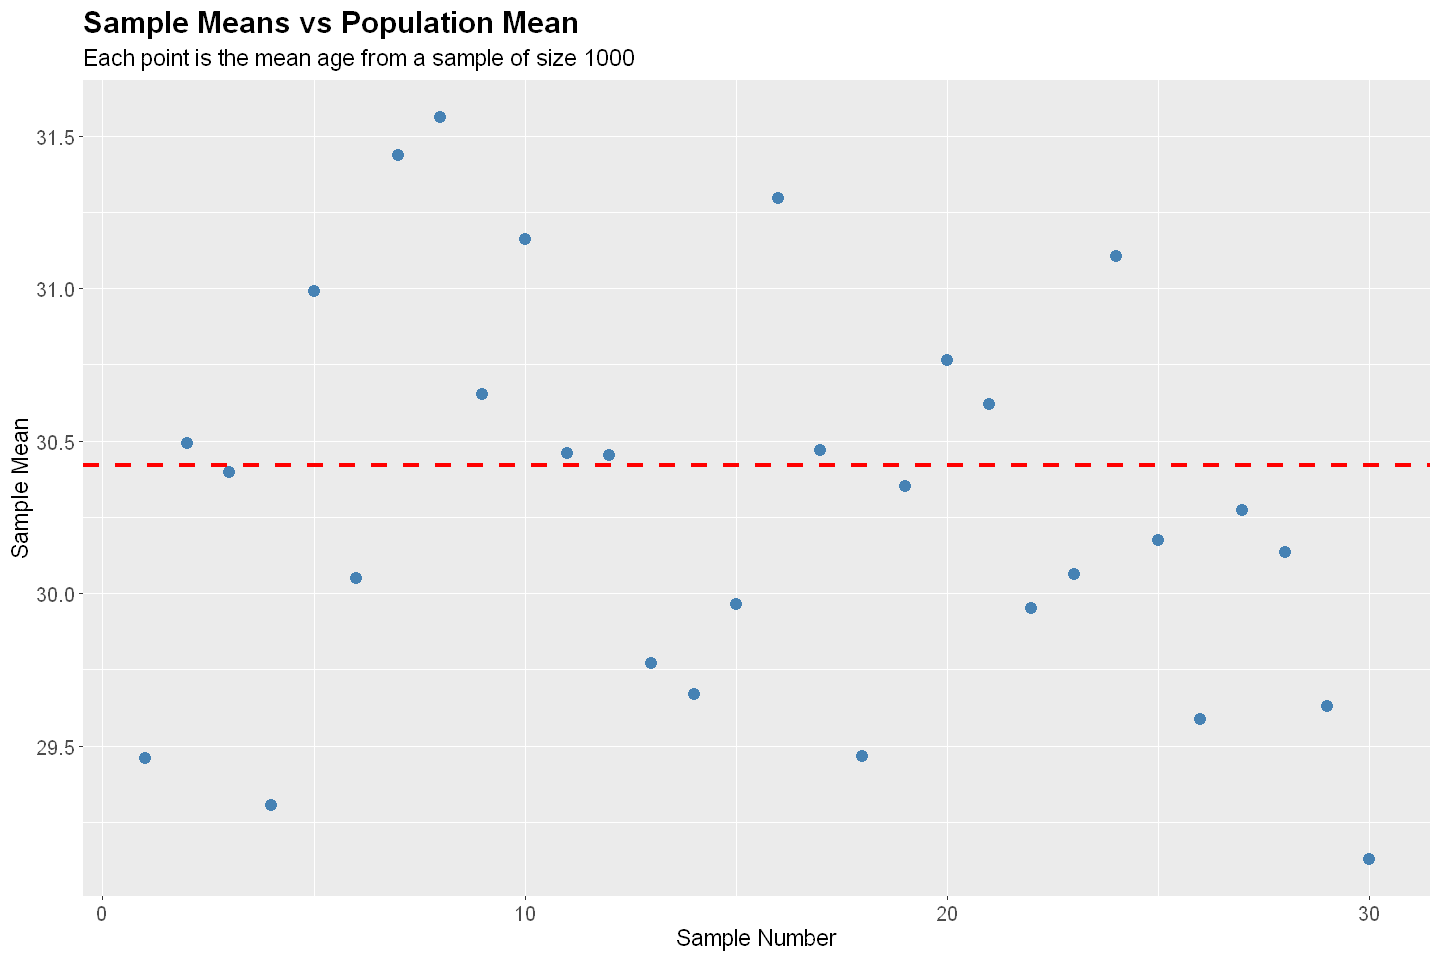

In [1]:
# 2024 ITUS Individual Data (original)
url <- "https://raw.githubusercontent.com/anmpahwa/CE5540/refs/heads/main/resources/ITUS_IND_OG.csv"
pop <- read.csv(url)

# Sampling - 30 random samples of size 1000 each
sml <- vector("list", 30)
for (i in 1:30) {
  sml[[i]] <- sample(pop$age, size = 1000, replace = FALSE)
}

# Compute population mean
pop_mean <- mean(pop$age, na.rm = TRUE)

# Compute sample means
sml_mean <- sapply(sml, function(x) mean(x, na.rm = TRUE))

# Plotting
library(ggplot2)
df <- data.frame(Sample = 1:30, SampleMean = sml_mean)
options(repr.plot.width = 12, repr.plot.height = 8)
ggplot(df, aes(x = Sample, y = SampleMean)) +
  geom_point(color = "steelblue", size = 3) +
  geom_hline(yintercept = pop_mean, color = "red", linetype = "dashed", linewidth = 1.2) +
  labs(title = "Sample Means vs Population Mean",
       subtitle = "Each point is the mean age from a sample of size 1000",
       y = "Sample Mean",
       x = "Sample Number") +
  theme(
    plot.title = element_text(size = 18, face = "bold"),
    plot.subtitle = element_text(size = 14),
    axis.title = element_text(size = 14),
    axis.text = element_text(size = 12)
  )

# Compute Bias, Standard Error, and Root Mean Squared Error
B <- mean(sml_mean) - pop_mean
SE <- sd(sml_mean)
RMSE <- sqrt(B^2 + SE^2)

# Print results
cat("Population Mean:", round(pop_mean, 2), "\n")
cat("Mean of Sample Means:", round(mean(sml_mean), 2), "\n")
cat("Bias:", round(B, 4), "\n")
cat("Standard Error (SE):", round(SE, 4), "\n")
cat("Root Mean Squared Error (RMSE):", round(RMSE, 4), "\n")